In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#reading csv file
df=pd.read_csv(r'C:\Users\dell\Documents\final_dataset.csv')
df

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [3]:
#displaying first 20 columns
df.head(20)


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
5,6,1,2021,0,3,155.59,180.14,142.71,10.29,1.18,44.47,252
6,7,1,2021,0,4,118.39,131.18,98.87,9.81,0.73,48.60,288
7,8,1,2021,0,5,140.05,184.29,102.61,10.34,0.79,43.06,248
8,9,1,2021,0,6,144.01,192.43,108.43,10.41,0.85,42.23,326
9,10,1,2021,1,7,131.57,180.38,93.31,9.92,0.69,51.96,284


In [4]:
#summary of data frame
df.info()
#check for null values(none in my case)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [5]:
#statistical summary of numeric columns
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [6]:
df.corr(numeric_only=True) 

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
Date,1.000000,0.010522,0.001384,0.019424,0.001487,0.020023,0.011082,0.008788,0.044515,0.033665,-0.010748,-0.001057
Month,0.010522,1.000000,-0.001204,0.002100,0.002824,-0.074140,0.046479,0.082342,0.142763,0.081195,-0.102716,-0.034169
Year,0.001384,-0.001204,1.000000,0.008144,-0.002600,-0.254641,0.034936,-0.078301,0.612480,-0.202139,0.092638,-0.083563
Holidays_Count,0.019424,0.002100,0.008144,1.000000,0.514644,-0.008869,-0.016789,-0.005577,0.008760,-0.003863,0.007388,0.000447
Days,0.001487,0.002824,-0.002600,0.514644,1.000000,0.006395,-0.024105,0.018301,-0.009367,0.000779,0.022247,0.002113
PM2.5,0.020023,-0.074140,-0.254641,-0.008869,0.006395,1.000000,0.721745,0.245283,-0.082946,0.690090,-0.159882,0.801960
PM10,0.011082,0.046479,0.034936,-0.016789,-0.024105,0.721745,1.000000,0.270478,0.131045,0.647241,-0.152054,0.899421
NO2,0.008788,0.082342,-0.078301,-0.005577,0.018301,0.245283,0.270478,1.000000,0.057626,0.329214,-0.155068,0.319261
SO2,0.044515,0.142763,0.612480,0.008760,-0.009367,-0.082946,0.131045,0.057626,1.000000,-0.068631,0.188534,0.036288
CO,0.033665,0.081195,-0.202139,-0.003863,0.000779,0.690090,0.647241,0.329214,-0.068631,1.000000,-0.199935,0.696809


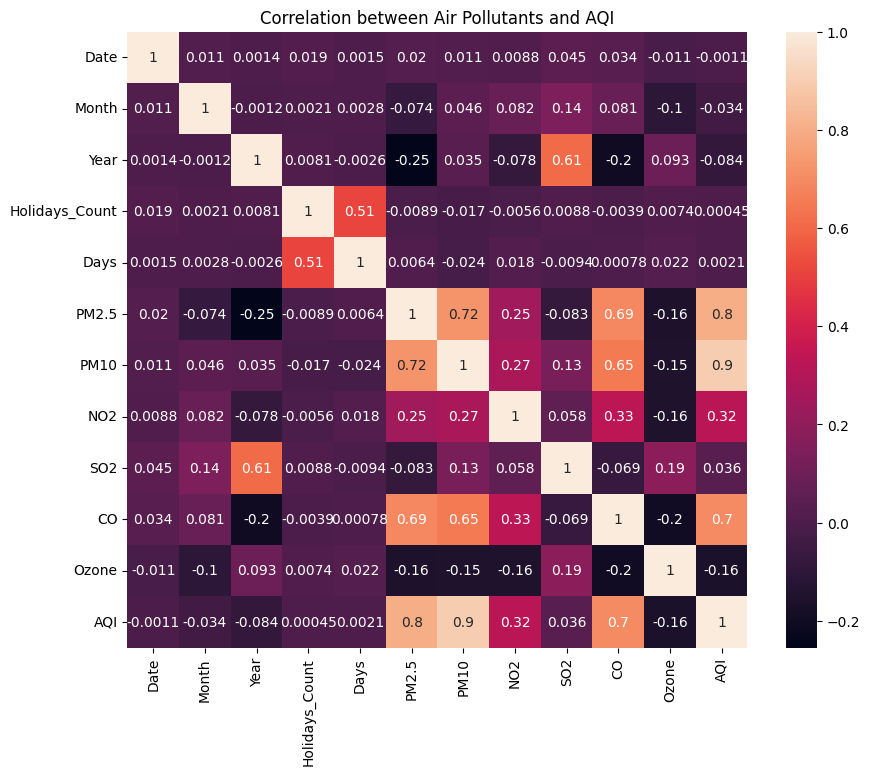

In [7]:
#heatmap to show correlation between air pollutants and AQI
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation between Air Pollutants and AQI')
plt.show()

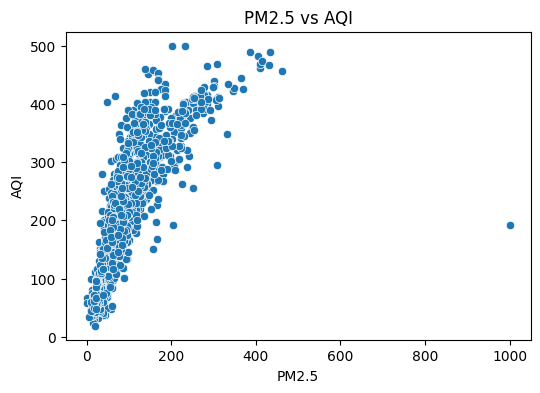

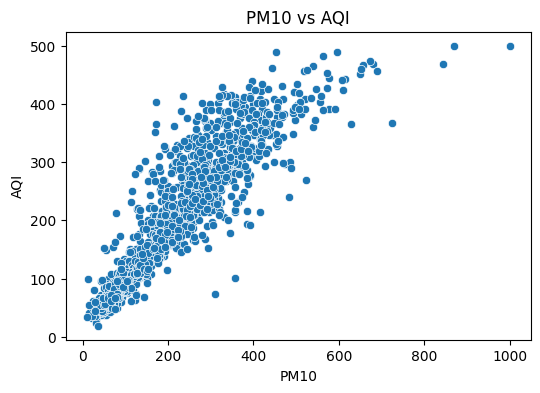

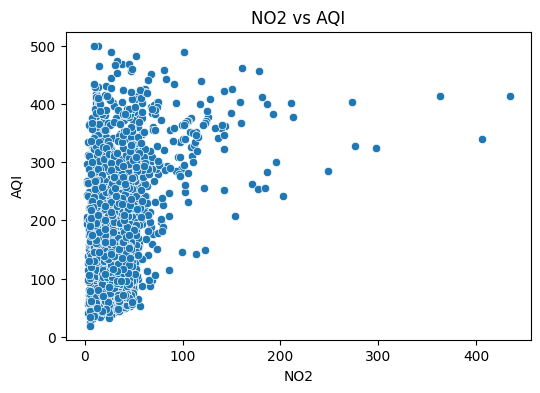

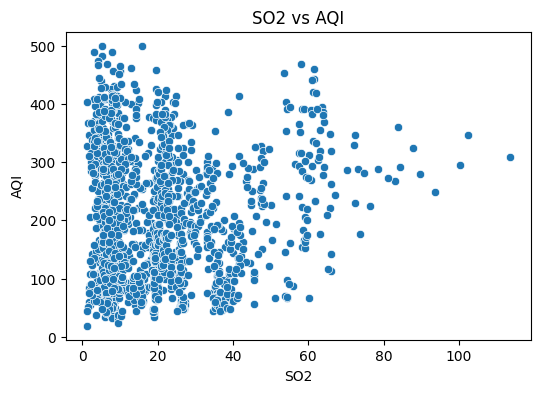

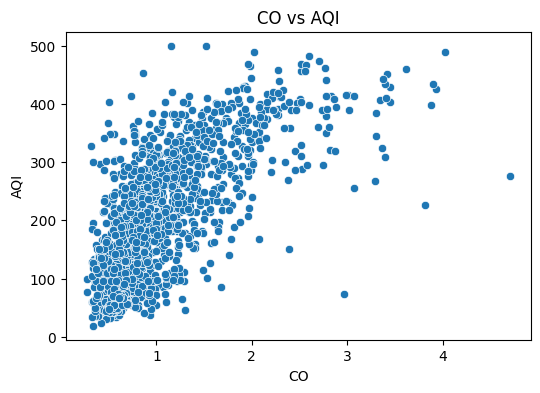

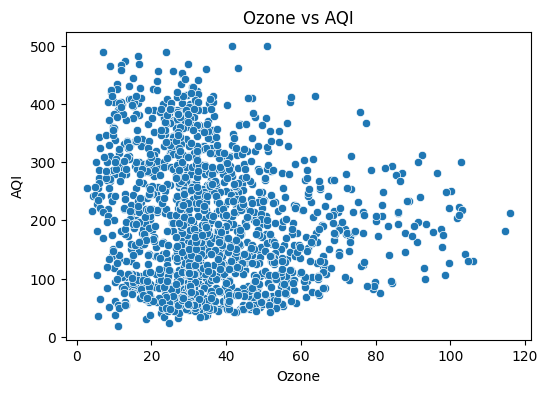

In [8]:
pollutants=['PM2.5','PM10','NO2','SO2','CO','Ozone']

for col in pollutants:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df,x=col,y='AQI')
    plt.title(col+ ' vs AQI')

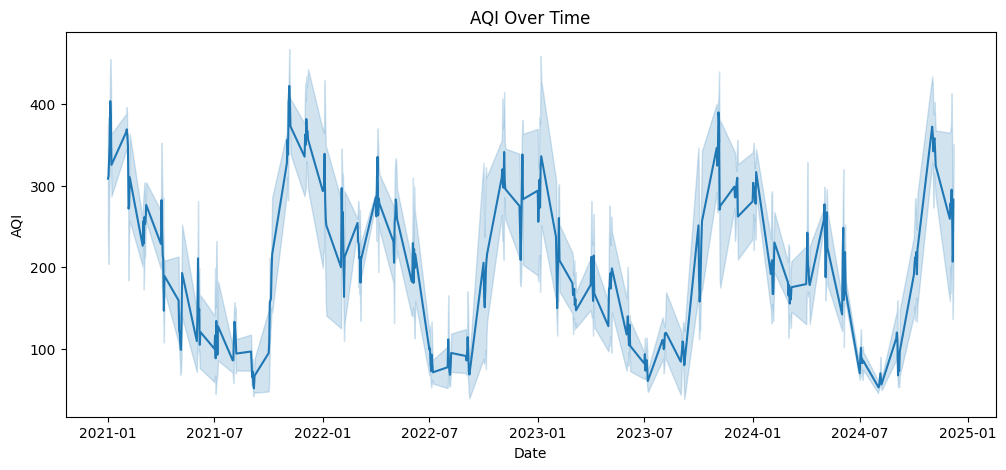

In [9]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Days']])
df = df.sort_values('Date')
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='AQI')
plt.title('AQI Over Time')
plt.show()
#AQI tends to spike up at the end of year in Delhi(possibly due to celebration of diwali festival which is celebrated in october or november)
#AQI drops during mid year
#It repeats every year

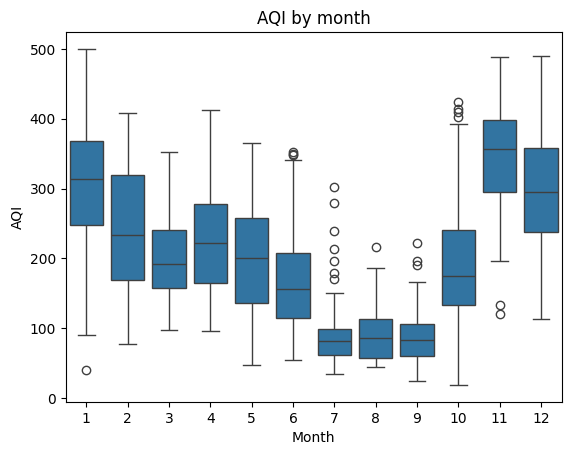

In [10]:
# Create a box plot to visualize AQI distribution across different months
sns.boxplot(data=df,x='Month',y='AQI')
plt.title('AQI by month')
plt.show()
#Again it proves that AQI spikes during end of the year and is best(lowest) during monsoon(month 7,8 and9)

# -----ML for predicting AQI------

In [11]:
#selecting features
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']]

#selecting target variable
y=df['AQI']

In [12]:
#splitting the dataset into training and testing(80% for training and 20% for testing)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#import library to calculate mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#creating a linear regrerssion model object
reg=LinearRegression()

#fitting the linear regression model using training data
reg.fit(X_train,y_train)

#making predictions on test data
lr_pred=reg.predict(X_test)

import numpy as np

#calculating root mean squared error 
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
print("Linear Regression RMSE:", lr_rmse) 
print("Linear Regression R²:", lr_r2)
print("Linear Regression MAE:", lr_mae)


Linear Regression RMSE: 44.51401521921917
Linear Regression R²: 0.8354639398794191
Linear Regression MAE: 30.537405791499094


In [14]:
from sklearn.ensemble import RandomForestRegressor 
#Random Forest Regressor model object
rf_model = RandomForestRegressor()

#fitting the random forest model using training data
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
#making predictions on test data
rf_pred = rf_model.predict(X_test)    

In [16]:
#calculating root mean squared error for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest RMSE:", rf_rmse) 
print("Random Forest R²:", rf_r2)
print("Random Forest MAE:", rf_mae)

Random Forest RMSE: 37.34173703208488
Random Forest R²: 0.8842138572374282
Random Forest MAE: 23.98508532423208


In [17]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=200,learning_rate=0.1,max_depth=5,random_state=42)

xgb_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R²:", xgb_r2)
print("XGBoost MAE:", xgb_mae)



XGBoost RMSE: 36.317108544691095
XGBoost R²: 0.8904808759689331
XGBoost MAE: 24.092609405517578


In [18]:
#comparing which model performs better based on RMSE value
if(rf_rmse > lr_rmse):
    print("Linear Regression works better")
else:
    print("Random Forest works better")

Random Forest works better


## ------DATA VISUALIZATION------

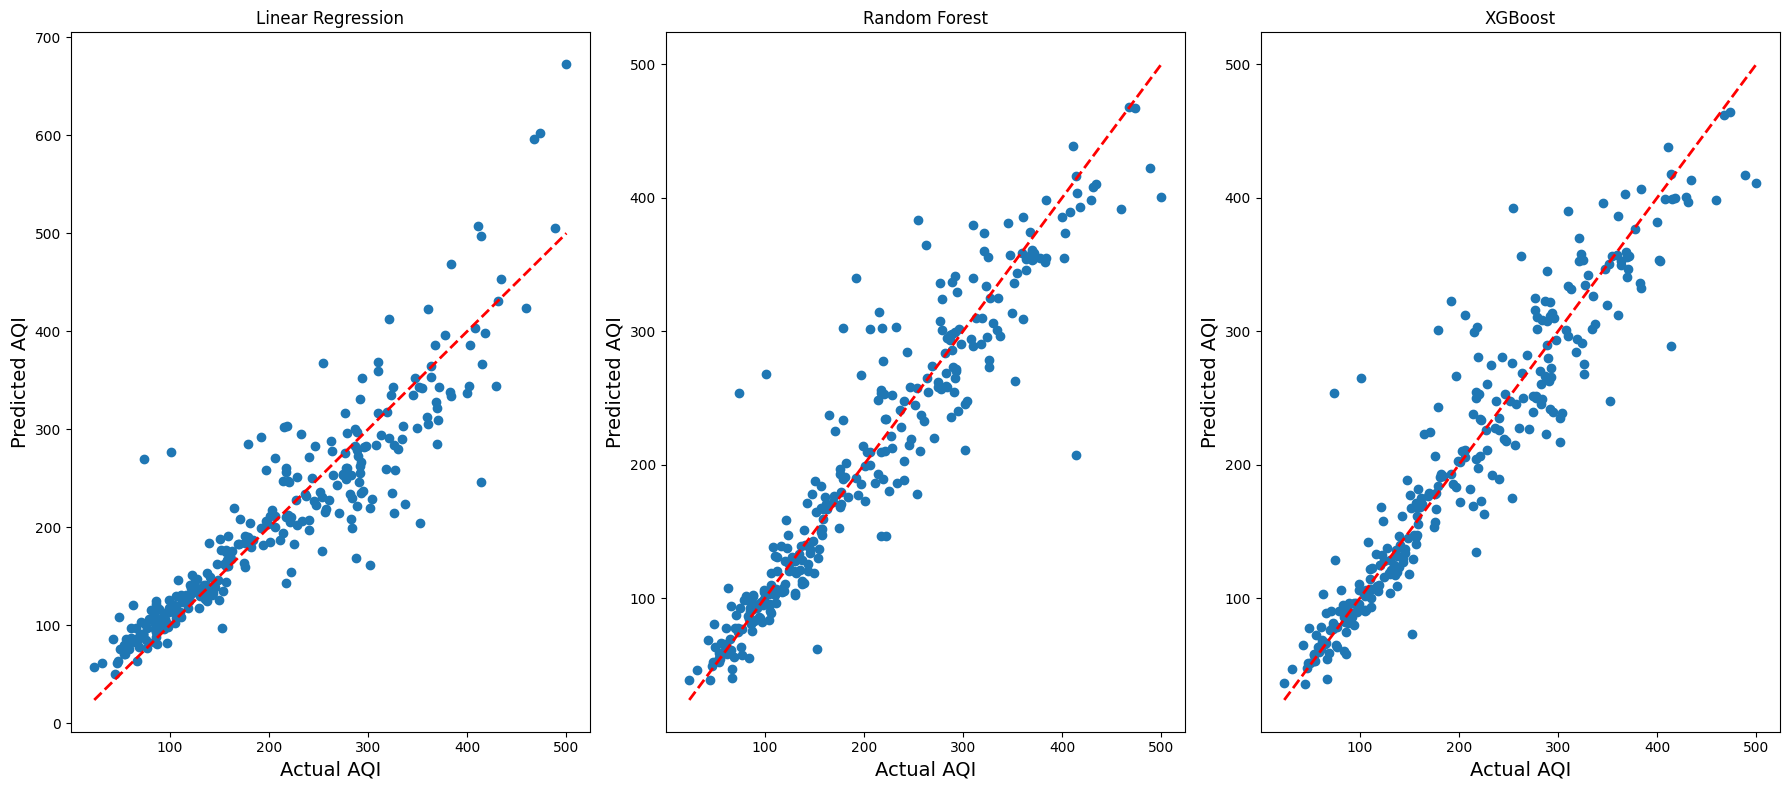

In [19]:
# to create 3 plots side by side for comparison
plt.figure(figsize=(18,8))   # wider figure for 3 plots

# Left subplot → Linear Regression
plt.subplot(1,3,1)
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual AQI',fontsize=14)
plt.ylabel('Predicted AQI',fontsize=14)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression')

# Middle subplot → Random Forest
plt.subplot(1,3,2)
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual AQI',fontsize=14)
plt.ylabel('Predicted AQI',fontsize=14)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest')

# Right subplot → XGBoost
plt.subplot(1,3,3)
plt.scatter(y_test,xgb_pred)   # use your xgboost predictions
plt.xlabel('Actual AQI',fontsize=14)
plt.ylabel('Predicted AQI',fontsize=14)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('XGBoost')

plt.tight_layout()
plt.show()

# HYPERPARAMETER TUNING

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Computer will test these combinations:
rf_param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],  
    "max_depth": [None, 10, 20, 30, 40],         
    "min_samples_split": [2, 5, 10],            
}


rf_random = RandomizedSearchCV(
    estimator=rf_model,           
    param_distributions=rf_param_grid,  
    n_iter=20,             
    cv=3,                  
    verbose=1,             
    random_state=42,       
    n_jobs=-1 )     

In [21]:
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [22]:
best_rf = rf_random.best_estimator_

In [23]:
best_rf = rf_random.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Best Parameters:", rf_random.best_params_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': None}


In [24]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
#rmse = mean_squared_error(y_test, y_pred_rf, squared=False)     
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse) 
print("R²:", r2)

MAE: 23.699914988928686
MSE: 1374.2313571538339
RMSE: 37.07062660859449
R²: 0.8858890271686973


In [25]:
xgb_param_grid = {
    "n_estimators": [200, 400, 600],        
    "max_depth": [3, 5, 7, 9],                     
    "learning_rate": [0.01, 0.05, 0.1],    
    "subsample": [0.7, 0.8, 1.0],                  
    "colsample_bytree": [0.7, 0.9, 1.0]
}

In [26]:
xgb_random = RandomizedSearchCV(
    estimator=xgb_reg,                   
    param_distributions=xgb_param_grid,  
    n_iter=20,                       
    cv=3,                            
    verbose=1,                        
    n_jobs=-1                        
)

In [27]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.9, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'n_estimators': [200, 400, ...], ...}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [28]:
best_xgb = xgb_random.best_estimator_

In [29]:
y_pred_xgb = best_xgb.predict(X_test)
print("Best Parameters:", xgb_random.best_params_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [30]:
mae = mean_absolute_error(y_test,y_pred_xgb)
mse = mean_squared_error(y_test,y_pred_xgb)
#rmse = mean_squared_error(y_test, y_pred_rf, squared=False)     
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse) 
print("R²:", r2)

MAE: 23.490062713623047
MSE: 1304.67724609375
RMSE: 36.12031625129755
R²: 0.8916645646095276


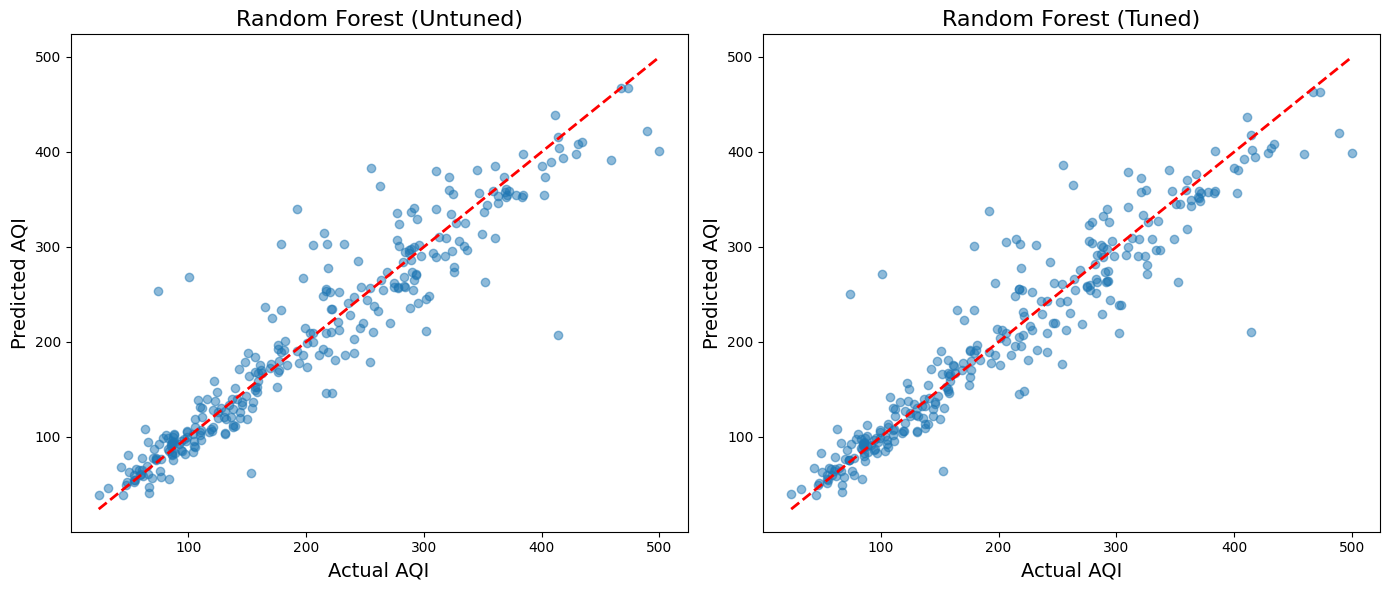

In [31]:
plt.figure(figsize=(14,6))

# --- Random Forest Untuned ---
plt.subplot(1,2,1)
plt.scatter(y_test, rf_pred, alpha=0.5, )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual AQI", fontsize=14)
plt.ylabel("Predicted AQI", fontsize=14)
plt.title("Random Forest (Untuned)", fontsize=16)

# --- Random Forest Tuned ---
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_rf, alpha=0.5,  )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual AQI", fontsize=14)
plt.ylabel("Predicted AQI", fontsize=14)
plt.title("Random Forest (Tuned)", fontsize=16)

plt.tight_layout()
plt.show()


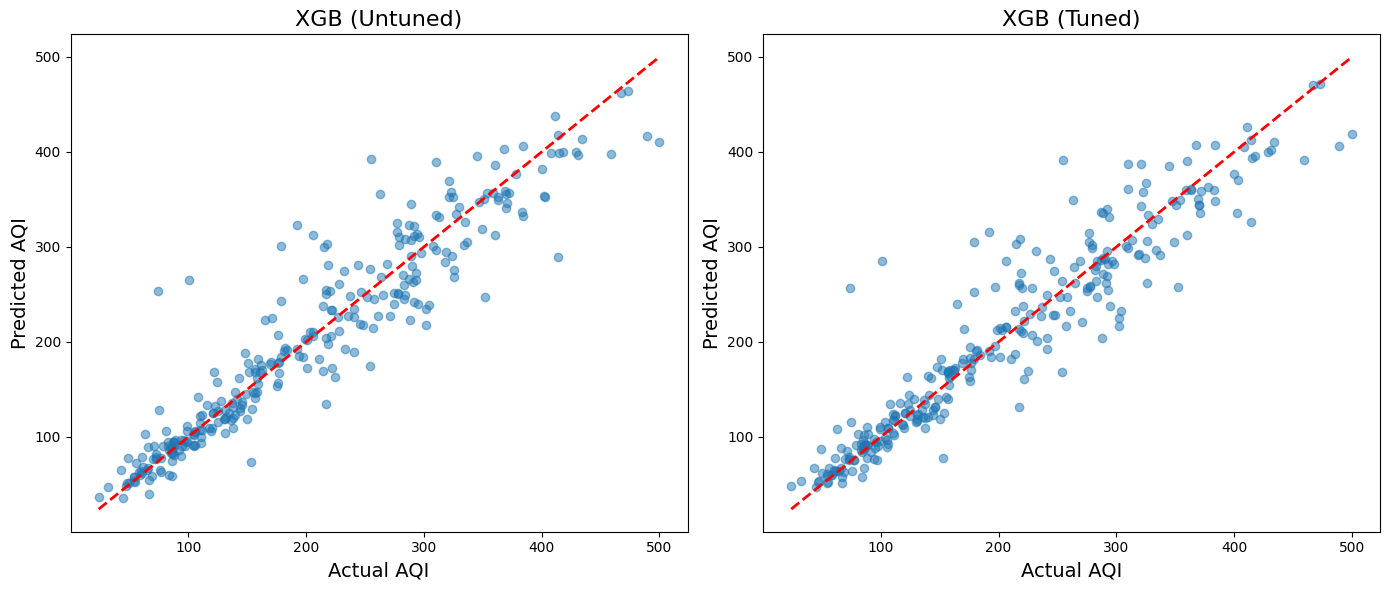

In [32]:
plt.figure(figsize=(14,6))

# ---XGB Untuned ---
plt.subplot(1,2,1)
plt.scatter(y_test, xgb_pred, alpha=0.5, )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual AQI", fontsize=14)
plt.ylabel("Predicted AQI", fontsize=14)
plt.title("XGB (Untuned)", fontsize=16)

# ---XGB Tuned ---
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_xgb, alpha=0.5,  )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual AQI", fontsize=14)
plt.ylabel("Predicted AQI", fontsize=14)
plt.title("XGB (Tuned)", fontsize=16)

plt.tight_layout()
plt.show()


In [33]:
#creating data frame for prophet
prophet_df = df[['Date', 'AQI']].rename(columns={'Date': 'ds', 'AQI': 'y'})


In [34]:
from prophet import Prophet

model=Prophet() #object for prophet modela
model.fit(prophet_df) #fitting data frame containing ds and y

20:54:11 - cmdstanpy - INFO - Chain [1] start processing
20:54:26 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = model.make_future_dataframe(periods=90)
#making predictions

In [36]:
prophet_df.tail()

,ds,y
1451,2024-12-07,392
1437,2024-12-07,302
1444,2024-12-07,293
1458,2024-12-07,142
1430,2024-12-07,285


In [37]:
future.tail(90)

,ds
336,2024-12-08
337,2024-12-09
338,2024-12-10
339,2024-12-11
340,2024-12-12
...,...
421,2025-03-03
422,2025-03-04
423,2025-03-05
424,2025-03-06


In [38]:
forecast=model.predict(future)

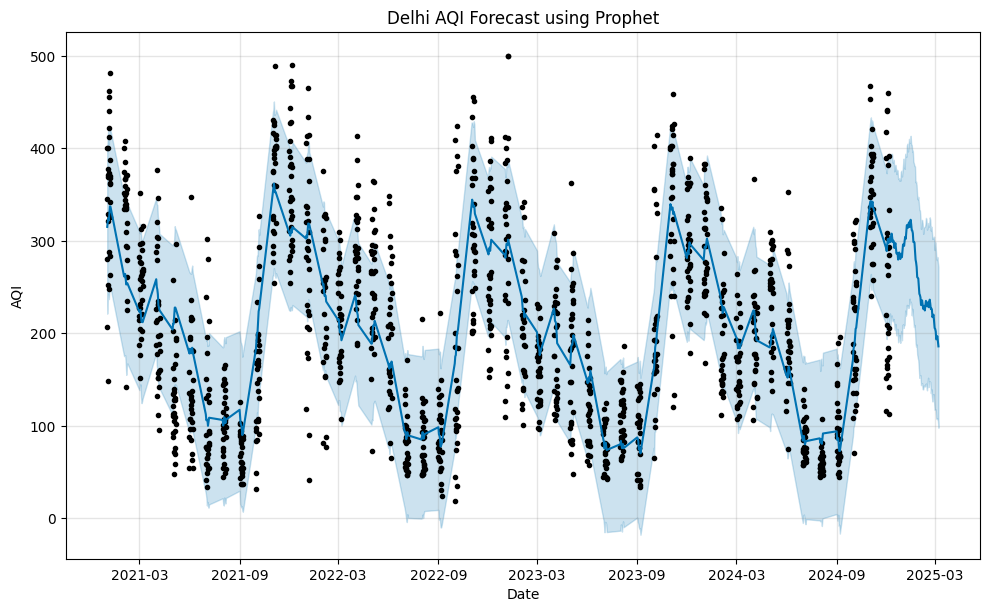

In [39]:
model.plot(forecast)
plt.title("Delhi AQI Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

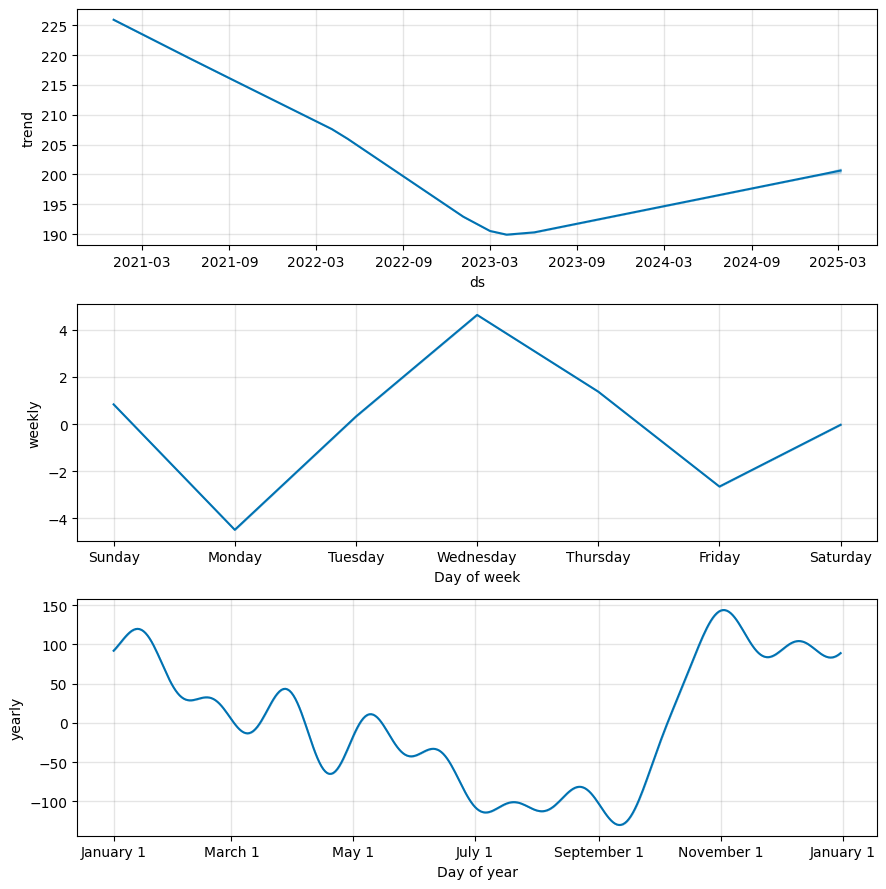

In [40]:
model.plot_components(forecast)
plt.show()